# Objective(s):

* This activity aims to demonstrate how to apply simple linear regression analysis to solve regression problem

# Intended Learning Outcomes (ILOs):
*  Demonstrate how to solve classification problems using Logistic Regression
* Use the logistic regression model to perform classification

# Resources:

Jupyter Notebook
Dataset: https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29

# Submission Requirements:

* PDF containing initial EDA and Data Wrangling
* PDF showing demonstration of simple linear regression.
* Submit a link to the colab file through the comment section.

In [7]:
import pandas as pd
import numpy as np

In [8]:
data = pd.read_csv('/content/risk_factors_cervical_cancer.csv')

In [19]:
print(data.head())

    Age  Number of sexual partners  First sexual intercourse  \
21   41                        3.0                      17.0   
22   40                        1.0                      18.0   
59   35                        3.0                      17.0   
68   35                        3.0                      20.0   
78   35                        3.0                      17.0   

    Num of pregnancies Smokes  Smokes (years)  Smokes (packs/year)  \
21                 4.0    0.0             0.0                  0.0   
22                 1.0    0.0             0.0                  0.0   
59                 4.0    0.0             0.0                  0.0   
68                 2.0    0.0             0.0                  0.0   
78                 6.0    1.0            13.0                  2.6   

   Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
21                     1.0                            10.00  0.0  ...   
22                     1.0                      

In [22]:
print(data.columns)

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')


In [20]:
# Summary statistics and data types
print(data.describe())

             Age  Number of sexual partners  First sexual intercourse  \
count  59.000000                  59.000000                 59.000000   
mean   27.457627                   2.711864                 17.050847   
std     8.090697                   1.426967                  2.944450   
min    15.000000                   1.000000                 10.000000   
25%    20.000000                   2.000000                 15.000000   
50%    28.000000                   3.000000                 17.000000   
75%    33.500000                   3.000000                 19.000000   
max    49.000000                   7.000000                 28.000000   

       Num of pregnancies  Smokes (years)  Smokes (packs/year)  \
count           59.000000       59.000000            59.000000   
mean             2.525424        2.314135             0.694292   
std              1.454552        4.736601             1.603797   
min              0.000000        0.000000             0.000000   
25%         

In [21]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 21 to 831
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 59 non-null     int64  
 1   Number of sexual partners           59 non-null     float64
 2   First sexual intercourse            59 non-null     float64
 3   Num of pregnancies                  59 non-null     float64
 4   Smokes                              59 non-null     object 
 5   Smokes (years)                      59 non-null     float64
 6   Smokes (packs/year)                 59 non-null     float64
 7   Hormonal Contraceptives             59 non-null     object 
 8   Hormonal Contraceptives (years)     59 non-null     float64
 9   IUD                                 59 non-null     object 
 10  IUD (years)                         59 non-null     float64
 11  STDs                                59 non-null   

In [31]:
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV     

In [32]:
# If there are missing values, visualize them using a heatmap
if missing_values.sum() > 0:
    plt.figure(figsize=(12, 8))  # Adjust the size to your preference
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Value Heatmap')
    plt.show()
else:
    print("No missing values detected in the dataset.")

No missing values detected in the dataset.


In [33]:
# Optional: Use an alternative method to mark and visualize missing values explicitly
if missing_values.sum() > 0:
    # Make a temporary copy of the dataset where NaNs are replaced with a unique value
    temp_data = data.fillna(-999)
    plt.figure(figsize=(12, 8))
    sns.heatmap(temp_data == -999, cbar=False, cmap='viridis')
    plt.title('Missing Value Heatmap - Explicit Null Marking')
    plt.show()

In [34]:
print("Data types of the dataset:")
print(data.dtypes)

Data types of the dataset:
Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                 object
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives                object
Hormonal Contraceptives (years)       float64
IUD                                    object
IUD (years)                           float64
STDs                                   object
STDs (number)                         float64
STDs:condylomatosis                    object
STDs:cervical condylomatosis           object
STDs:vaginal condylomatosis            object
STDs:vulvo-perineal condylomatosis     object
STDs:syphilis                          object
STDs:pelvic inflammatory disease       object
STDs:genital herpes                    object
STDs:molluscum contagiosum             object
STDs:AI

In [27]:
for column in data.columns:
    if data[column].dtype == 'float64' or data[column].dtype == 'int64':
        data[column].fillna(data[column].median(), inplace=True)

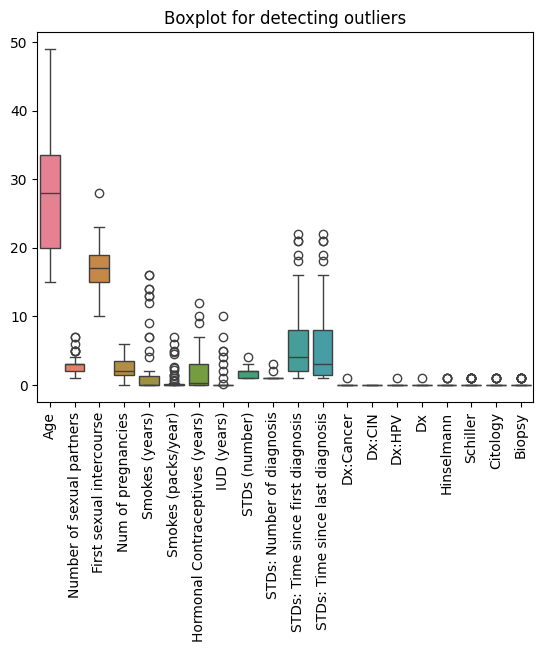

In [28]:
sns.boxplot(data=data)
plt.title('Boxplot for detecting outliers')
plt.xticks(rotation=90)
plt.show()

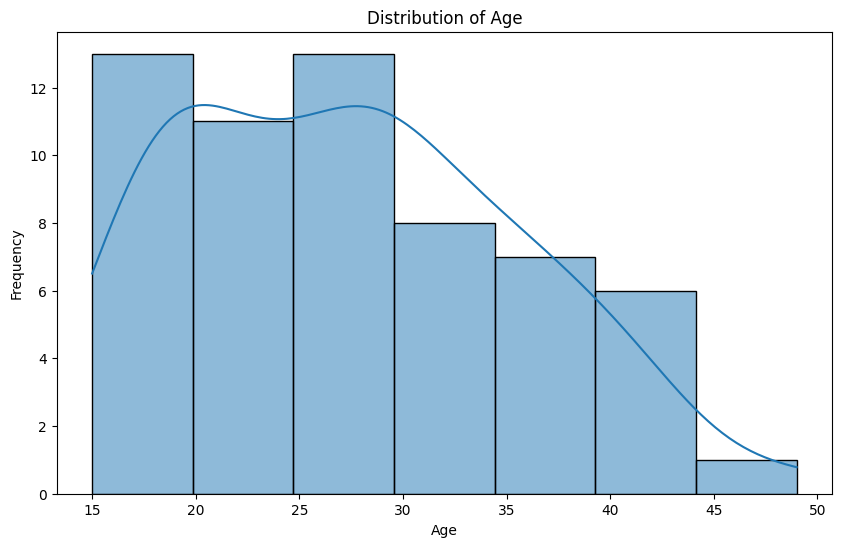

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

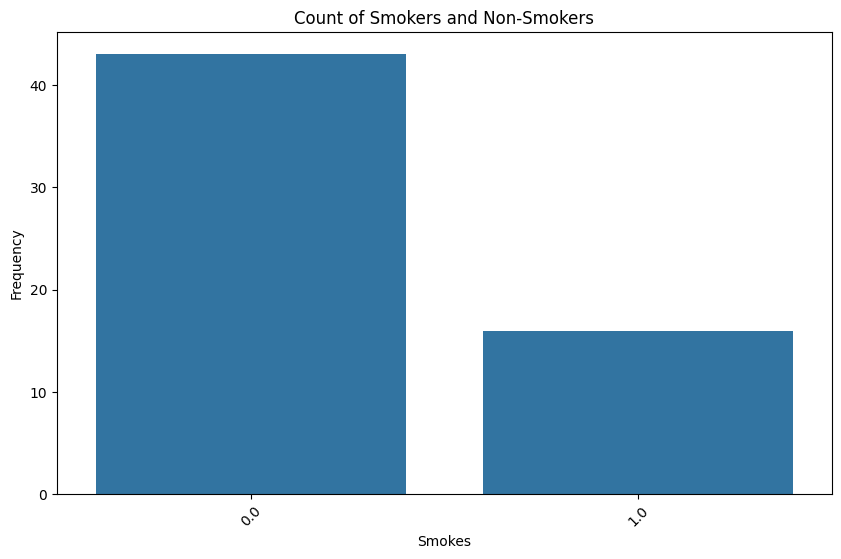

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Smokes'].astype(str))
plt.title('Count of Smokers and Non-Smokers')
plt.xlabel('Smokes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

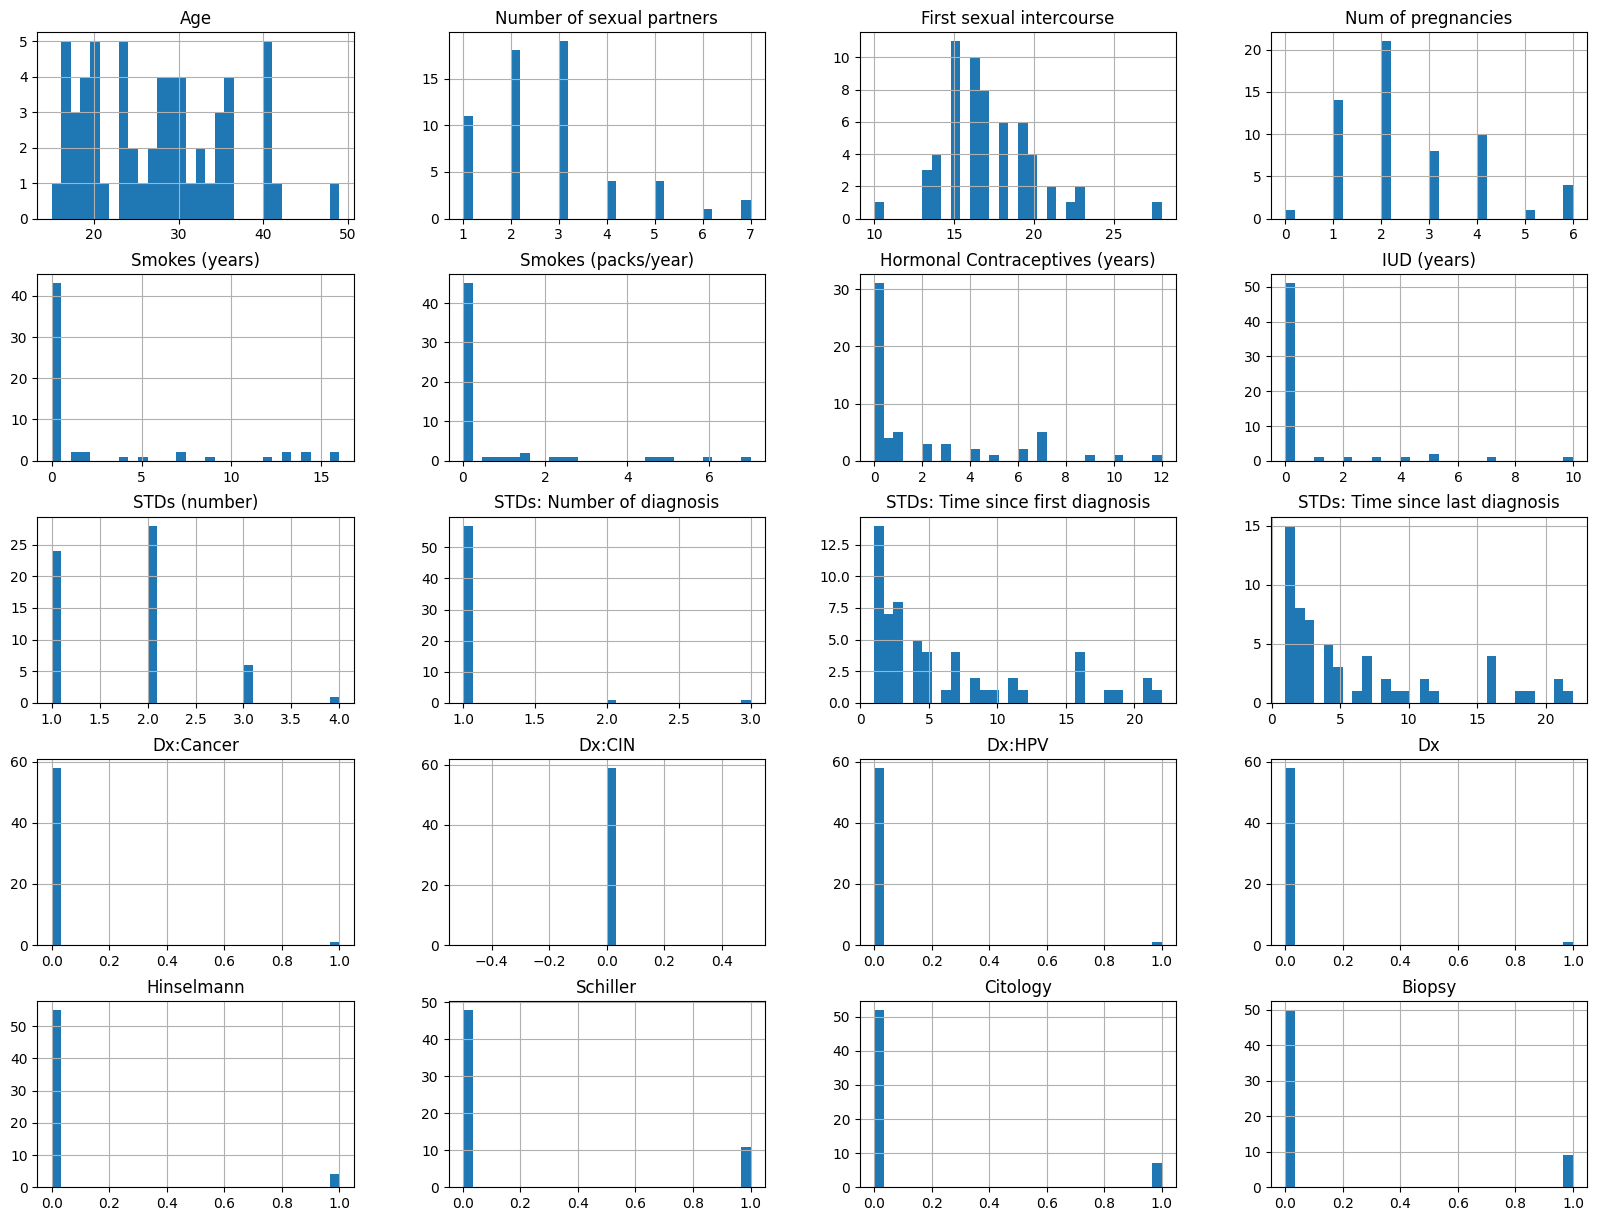

In [35]:
data.hist(figsize=(20, 15), bins=30)
plt.show()

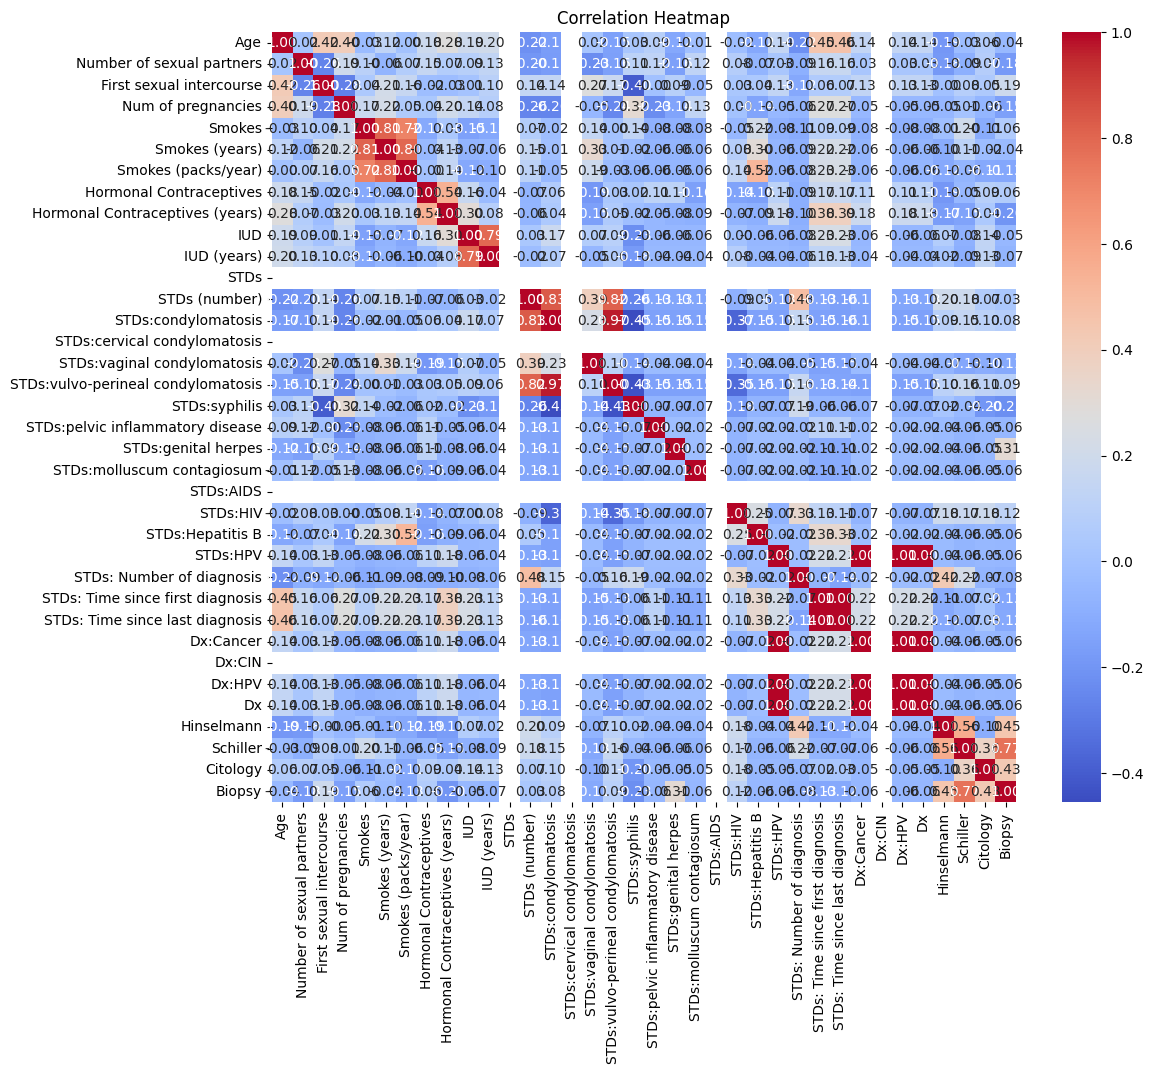

In [50]:
plt.figure(figsize=(12, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Corrected this line
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
data['Number of sexual partners'] = pd.to_numeric(data['Number of sexual partners'], errors='coerce')

data = data.dropna(subset=['Number of sexual partners'])

X = data[['Age']]
Y = data['Number of sexual partners']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.48677832650065506
R-squared: -0.16826798360157214


Coefficient(s): [0.00335662]
Mean Squared Error: 0.49
Coefficient of Determination: -0.17


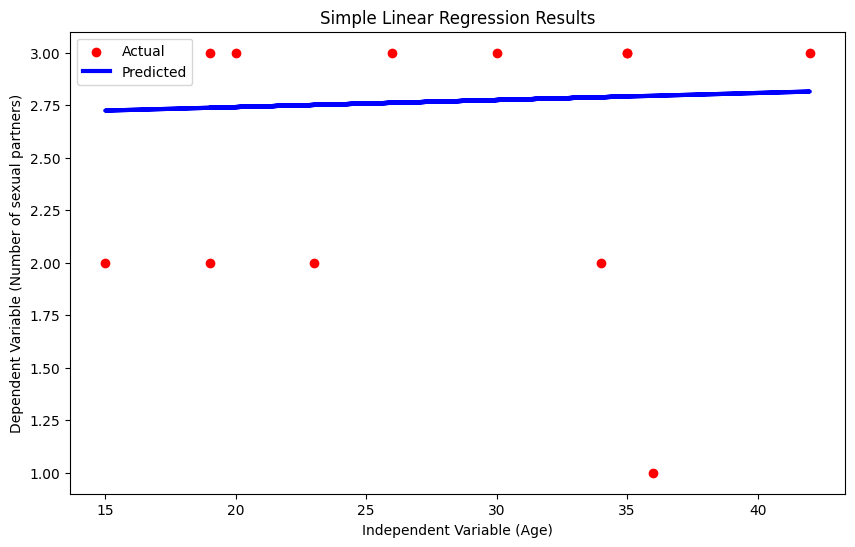

In [57]:
print('Coefficient(s):', model.coef_)

mse = mean_squared_error(Y_test, Y_pred)
print('Mean Squared Error: {:.2f}'.format(mse))

r_squared = r2_score(Y_test, Y_pred)
print('Coefficient of Determination: {:.2f}'.format(r_squared))

plt.figure(figsize=(10, 6))
plt.scatter(X_test, Y_test, color='red', label='Actual')
plt.plot(X_test, Y_pred, color='blue', linewidth=3, label='Predicted')
plt.title('Simple Linear Regression Results')
plt.xlabel('Independent Variable (Age)')
plt.ylabel('Dependent Variable (Number of sexual partners)')
plt.legend()
plt.show()

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [63]:
X = data.drop('Biopsy', axis=1)  # Features
Y = data['Biopsy']  # Target variable

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, Y_train)

Y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: \n{conf_matrix}")
print(f"Classification Report: \n{class_report}")


Accuracy: 0.9166666666666666
Confusion Matrix: 
[[11  0]
 [ 1  0]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       0.00      0.00      0.00         1

    accuracy                           0.92        12
   macro avg       0.46      0.50      0.48        12
weighted avg       0.84      0.92      0.88        12



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have a fitted model and a test set (X_test, Y_test)
# model.predict_proba(X_test)[:, 1] would give you the probabilities of the positive class
Y_probs = logistic_model.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR, and the AUC
fpr, tpr, thresholds = roc_curve(Y_test, Y_probs)
roc_auc = auc(fpr, tpr)


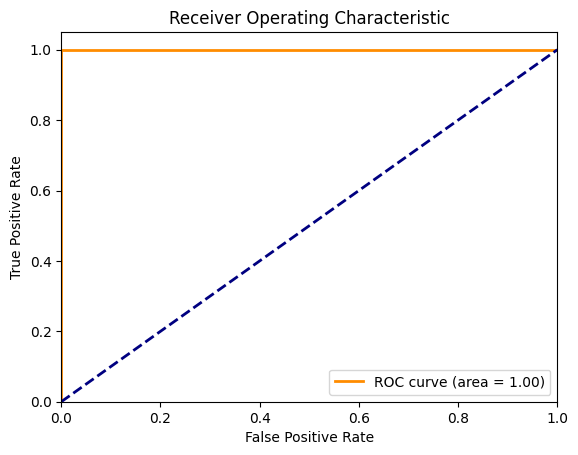

In [65]:
# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()